# Even More Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.precision',2)

## Merging data sets

In [2]:
EUurl ='http://research.stlouisfed.org/fred2/series/CPMNACSCAB1GQEU272020/downloaddata/CPMNACSCAB1GQEU272020.csv'
USurl ='http://research.stlouisfed.org/fred2/series/GDPC1/downloaddata/GDPC1.csv'

In [3]:
EU = pd.read_csv(EUurl,index_col=0, parse_dates=True)

In [4]:
US = pd.read_csv(USurl,index_col=0, parse_dates=True)

In [5]:
EU.head()

,VALUE
DATE,
1995-01-01,1552354.4
1995-04-01,1570789.0
1995-07-01,1598189.4
1995-10-01,1617059.4
1996-01-01,1634591.9


In [6]:
EU.tail()

,VALUE
DATE,
2020-10-01,3442058.4
2021-01-01,3471670.8
2021-04-01,3557937.4
2021-07-01,3677584.9
2021-10-01,3729406.2


<AxesSubplot:xlabel='DATE'>

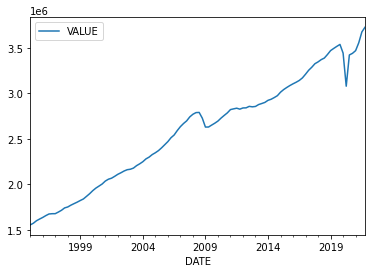

In [7]:
EU.plot(label='GDP')

<AxesSubplot:xlabel='DATE'>

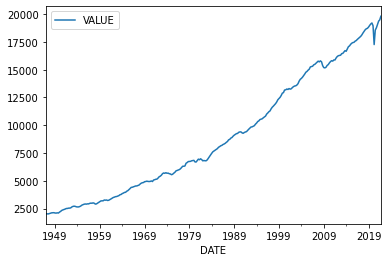

In [8]:
US.plot()

Now we want to merge the two data sets. There are three ways to do it.

1. pd.concat([dfs...])
2. pd.merge(df1, df2)
3. df1.join(df2)

In [9]:
US

,VALUE
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442
...,...
2020-10-01,18767.778
2021-01-01,19055.655
2021-04-01,19368.310


In [10]:
US.index

DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01',
               ...
               '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
               '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',
               '2021-07-01', '2021-10-01'],
              dtype='datetime64[ns]', name='DATE', length=300, freq=None)

In [11]:
EU

,VALUE
DATE,
1995-01-01,1552354.4
1995-04-01,1570789.0
1995-07-01,1598189.4
1995-10-01,1617059.4
1996-01-01,1634591.9
...,...
2020-10-01,3442058.4
2021-01-01,3471670.8
2021-04-01,3557937.4


### `concat`

In [12]:
# Default: axis=0, two frames are stacked on top of each other
pd.concat([US, EU])

,VALUE
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442
...,...
2020-10-01,3442058.400
2021-01-01,3471670.800
2021-04-01,3557937.400


In [13]:
# axis = 1: side by side
pd.concat([EU,US], axis=1)

,VALUE,VALUE
DATE,,
1947-01-01,NaN,2034.450
1947-04-01,NaN,2029.024
1947-07-01,NaN,2024.834
1947-10-01,NaN,2056.508
1948-01-01,NaN,2087.442
...,...,...
2020-10-01,3442058.4,18767.778
2021-01-01,3471670.8,19055.655
2021-04-01,3557937.4,19368.310


In [14]:
names = {'VALUE':'EU_GDP'}
EU2 = EU.rename(columns=names)

In [15]:
pd.concat([US,EU2],axis=0) 

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,NaN,3442058.4
2021-01-01,NaN,3471670.8
2021-04-01,NaN,3557937.4


In [16]:
pd.concat([US,EU2],axis=1)

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [17]:
pd.concat([US,EU2],axis=1,join='inner')

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


### `merge`

In [18]:
# This did not work because VALUE is the only common column name, which by default is used to join
pd.merge(US, EU)

,VALUE


In [19]:
# Won't work. No common column
# pd.merge(US,EU2)

In [20]:
pd.merge(US,EU,on='DATE')

,VALUE_x,VALUE_y
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [21]:
pd.merge(US,EU,left_on='DATE',right_on='DATE')

,VALUE_x,VALUE_y
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [22]:
pd.merge(US,EU, left_index=True, right_index=True)

,VALUE_x,VALUE_y
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [23]:
pd.merge(US,EU2,on='DATE')

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [24]:
pd.merge(US.reset_index(),EU2.reset_index())

,DATE,VALUE,EU_GDP
0,1995-01-01,10550.251,1552354.4
1,1995-04-01,10581.723,1570789.0
2,1995-07-01,10671.738,1598189.4
3,1995-10-01,10744.203,1617059.4
4,1996-01-01,10824.674,1634591.9
...,...,...,...
103,2020-10-01,18767.778,3442058.4
104,2021-01-01,19055.655,3471670.8
105,2021-04-01,19368.310,3557937.4
106,2021-07-01,19478.893,3677584.9


In [25]:
pd.merge(US.reset_index(),EU2.reset_index(),how='outer')

,DATE,VALUE,EU_GDP
0,1947-01-01,2034.450,NaN
1,1947-04-01,2029.024,NaN
2,1947-07-01,2024.834,NaN
3,1947-10-01,2056.508,NaN
4,1948-01-01,2087.442,NaN
...,...,...,...
295,2020-10-01,18767.778,3442058.4
296,2021-01-01,19055.655,3471670.8
297,2021-04-01,19368.310,3557937.4
298,2021-07-01,19478.893,3677584.9


### `join`

Similar to `merge`, but for the right dataframe, it only allows you to use the index as the join key. The left index is used unless you specify the `on` option. 

The default is `how = left`

In [26]:
# Almost worked, just need to disentangle the two columns named VALUE with suffices
# US.join(EU)

In [27]:
US.join(EU, lsuffix='_US', rsuffix='_EU')

,VALUE_US,VALUE_EU
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [28]:
EU.join(US, lsuffix='_EU', rsuffix='_US')

,VALUE_EU,VALUE_US
DATE,,
1995-01-01,1552354.4,10550.251
1995-04-01,1570789.0,10581.723
1995-07-01,1598189.4,10671.738
1995-10-01,1617059.4,10744.203
1996-01-01,1634591.9,10824.674
...,...,...
2020-10-01,3442058.4,18767.778
2021-01-01,3471670.8,19055.655
2021-04-01,3557937.4,19368.310


In [29]:
US.join(EU2)

,VALUE,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


In [30]:
US.join(EU2,how='inner')

,VALUE,EU_GDP
DATE,,
1995-01-01,10550.251,1552354.4
1995-04-01,10581.723,1570789.0
1995-07-01,10671.738,1598189.4
1995-10-01,10744.203,1617059.4
1996-01-01,10824.674,1634591.9
...,...,...
2020-10-01,18767.778,3442058.4
2021-01-01,19055.655,3471670.8
2021-04-01,19368.310,3557937.4


### Exercise

Download unemployment rates for the US and the EU. 

* Resample the data into quarterly data.
* Merge the two dataframes into one

In [31]:
EUurl2 = 'http://research.stlouisfed.org/fred2/series/LRHUTTTTEUM156S/downloaddata/LRHUTTTTEUM156S.csv'

In [32]:
USurl2 = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'

In [33]:
EU_unemp = pd.read_csv(EUurl2,index_col=0, parse_dates=True)

In [34]:
US_unemp = pd.read_csv(USurl2,index_col=0, parse_dates=True)

In [35]:
US_unemp.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [36]:
EU_unemp.head()

,VALUE
DATE,
2000-01-01,9.2
2000-02-01,9.2
2000-03-01,9.2
2000-04-01,9.1
2000-05-01,9.1


<AxesSubplot:xlabel='DATE'>

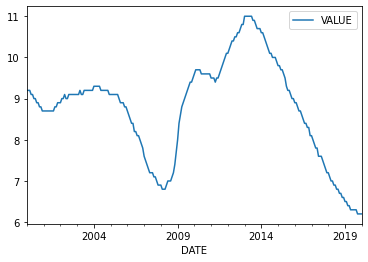

In [37]:
EU_unemp.plot()

<AxesSubplot:xlabel='DATE'>

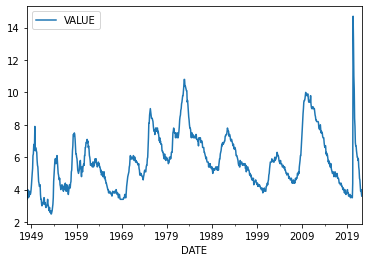

In [38]:
US_unemp.plot()

<AxesSubplot:xlabel='DATE'>

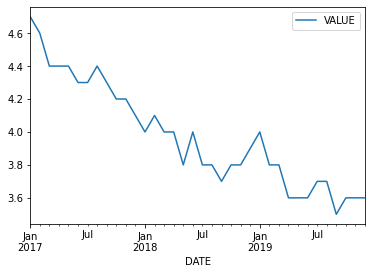

In [39]:
US_unemp.loc['2017':'2019'].plot()

<AxesSubplot:xlabel='DATE'>

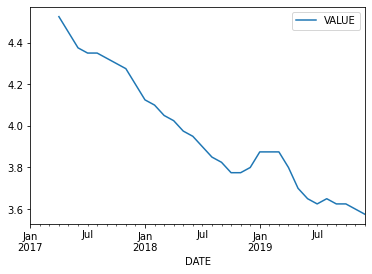

In [40]:
US_unemp.loc['2017':'2019'].rolling(window=4).mean().plot()

 [resample offset strings ](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [41]:
USQ = US_unemp.resample('QS').mean()
EUQ = EU_unemp.resample('QS').mean()

In [42]:
USQ.head()

,VALUE
DATE,
1948-01-01,3.733333
1948-04-01,3.666667
1948-07-01,3.766667
1948-10-01,3.833333
1949-01-01,4.666667


In [43]:
USQ.rename(columns={'VALUE':'US_Unemp'},inplace=True)
EUQ.rename(columns={'VALUE':'EU_Unemp'},inplace=True)
US.rename(columns={'VALUE':'US_GDP'},inplace=True)
EU.rename(columns={'VALUE':'EU_GDP'},inplace=True)

In [44]:
gdp = US.join(EU)

In [45]:
gdp.head()

,US_GDP,EU_GDP
DATE,,
1947-01-01,2034.450,NaN
1947-04-01,2029.024,NaN
1947-07-01,2024.834,NaN
1947-10-01,2056.508,NaN
1948-01-01,2087.442,NaN


In [46]:
unrate = pd.merge(USQ, EUQ, on='DATE',how='left')

In [47]:
unrate.head()

,US_Unemp,EU_Unemp
DATE,,
1948-01-01,3.733333,NaN
1948-04-01,3.666667,NaN
1948-07-01,3.766667,NaN
1948-10-01,3.833333,NaN
1949-01-01,4.666667,NaN


In [48]:
pd.merge(gdp, unrate, on='DATE', how='inner')

,US_GDP,EU_GDP,US_Unemp,EU_Unemp
DATE,,,,
1948-01-01,2087.442,NaN,3.733333,NaN
1948-04-01,2121.899,NaN,3.666667,NaN
1948-07-01,2134.056,NaN,3.766667,NaN
1948-10-01,2136.440,NaN,3.833333,NaN
1949-01-01,2107.001,NaN,4.666667,NaN
...,...,...,...,...
2020-10-01,18767.778,3442058.4,6.766667,NaN
2021-01-01,19055.655,3471670.8,6.200000,NaN
2021-04-01,19368.310,3557937.4,5.900000,NaN


In [49]:
all4 = pd.merge(gdp,unrate, on='DATE', how='left')

In [50]:
all4.head()

,US_GDP,EU_GDP,US_Unemp,EU_Unemp
DATE,,,,
1947-01-01,2034.450,NaN,NaN,NaN
1947-04-01,2029.024,NaN,NaN,NaN
1947-07-01,2024.834,NaN,NaN,NaN
1947-10-01,2056.508,NaN,NaN,NaN
1948-01-01,2087.442,NaN,3.733333,NaN


In [51]:
all4.dropna(inplace=True)

In [52]:
all4

,US_GDP,EU_GDP,US_Unemp,EU_Unemp
DATE,,,,
2000-01-01,12935.252,1929796.3,4.033333,9.200000
2000-04-01,13170.749,1958026.9,3.933333,9.066667
2000-07-01,13183.890,1980400.2,4.000000,8.933333
2000-10-01,13262.250,2003035.1,3.900000,8.766667
2001-01-01,13219.251,2035211.3,4.233333,8.700000
...,...,...,...,...
2019-01-01,18833.195,3472100.4,3.866667,6.466667
2019-04-01,18982.528,3496088.9,3.600000,6.333333
2019-07-01,19112.653,3518833.2,3.633333,6.300000


## Merge data with hierarchical indices

In [53]:
US.head()

,US_GDP
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


In [54]:
US['country'] = 'US'

In [55]:
US

,US_GDP,country
DATE,,
1947-01-01,2034.450,US
1947-04-01,2029.024,US
1947-07-01,2024.834,US
1947-10-01,2056.508,US
1948-01-01,2087.442,US
...,...,...
2020-10-01,18767.778,US
2021-01-01,19055.655,US
2021-04-01,19368.310,US


In [56]:
EU['country'] = 'EU'

In [57]:
EU.head()

,EU_GDP,country
DATE,,
1995-01-01,1552354.4,EU
1995-04-01,1570789.0,EU
1995-07-01,1598189.4,EU
1995-10-01,1617059.4,EU
1996-01-01,1634591.9,EU


In [58]:
US.rename(columns={'US_GDP':'GDP'},inplace=True)
EU.rename(columns={'EU_GDP':'GDP'},inplace=True)

In [59]:
gdpdata = pd.concat([US, EU])

In [60]:
gdpdata

,GDP,country
DATE,,
1947-01-01,2034.450,US
1947-04-01,2029.024,US
1947-07-01,2024.834,US
1947-10-01,2056.508,US
1948-01-01,2087.442,US
...,...,...
2020-10-01,3442058.400,EU
2021-01-01,3471670.800,EU
2021-04-01,3557937.400,EU


In [61]:
gdpdata.reset_index(inplace=True)

In [62]:
gdpdata

,DATE,GDP,country
0,1947-01-01,2034.450,US
1,1947-04-01,2029.024,US
2,1947-07-01,2024.834,US
3,1947-10-01,2056.508,US
4,1948-01-01,2087.442,US
...,...,...,...
403,2020-10-01,3442058.400,EU
404,2021-01-01,3471670.800,EU
405,2021-04-01,3557937.400,EU
406,2021-07-01,3677584.900,EU


In [63]:
gdpdata.set_index(['country','DATE'],inplace=True)

In [64]:
gdpdata

GDP
country DATE                   
US      1947-01-01     2034.450
        1947-04-01     2029.024
        1947-07-01     2024.834
        1947-10-01     2056.508
        1948-01-01     2087.442
...                         ...
EU      2020-10-01  3442058.400
        2021-01-01  3471670.800
        2021-04-01  3557937.400
        2021-07-01  3677584.900
        2021-10-01  3729406.200

[408 rows x 1 columns]

In [65]:
gdpdata.index

MultiIndex([('US', '1947-01-01'),
            ('US', '1947-04-01'),
            ('US', '1947-07-01'),
            ('US', '1947-10-01'),
            ('US', '1948-01-01'),
            ('US', '1948-04-01'),
            ('US', '1948-07-01'),
            ('US', '1948-10-01'),
            ('US', '1949-01-01'),
            ('US', '1949-04-01'),
            ...
            ('EU', '2019-07-01'),
            ('EU', '2019-10-01'),
            ('EU', '2020-01-01'),
            ('EU', '2020-04-01'),
            ('EU', '2020-07-01'),
            ('EU', '2020-10-01'),
            ('EU', '2021-01-01'),
            ('EU', '2021-04-01'),
            ('EU', '2021-07-01'),
            ('EU', '2021-10-01')],
           names=['country', 'DATE'], length=408)

In [66]:
gdpdata.loc['EU']

,GDP
DATE,
1995-01-01,1552354.4
1995-04-01,1570789.0
1995-07-01,1598189.4
1995-10-01,1617059.4
1996-01-01,1634591.9
...,...
2020-10-01,3442058.4
2021-01-01,3471670.8
2021-04-01,3557937.4


In [67]:
gdpdata.loc['US']

,GDP
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442
...,...
2020-10-01,18767.778
2021-01-01,19055.655
2021-04-01,19368.310


In [68]:
gdpdata['GDP']

country  DATE      
US       1947-01-01       2034.450
         1947-04-01       2029.024
         1947-07-01       2024.834
         1947-10-01       2056.508
         1948-01-01       2087.442
                          ...     
EU       2020-10-01    3442058.400
         2021-01-01    3471670.800
         2021-04-01    3557937.400
         2021-07-01    3677584.900
         2021-10-01    3729406.200
Name: GDP, Length: 408, dtype: float64

In [69]:
gdpdata.loc[('US','2020')]

,GDP
DATE,
2020-01-01,18951.992
2020-04-01,17258.205
2020-07-01,18560.774
2020-10-01,18767.778


## Exercises
**Slicing Rules**

* list in row slicing will be an “or” operation, where it chooses rows based on whether the index value corresponds to any element of the list.

* tuple in row slicing will be used to denote a single hierarchical index and must include a value for each level.

In [70]:
gdpdata.loc[('US','2020-04-01')]

GDP    17258.205
Name: (US, 2020-04-01 00:00:00), dtype: float64

In [71]:
gdpdata.loc[('EU','2020-04-01')]

GDP    3080129.4
Name: (EU, 2020-04-01 00:00:00), dtype: float64

In [72]:
gdpdata.loc[('US',['2019-01-01','2020-01-01']),:]

GDP
country DATE                 
US      2019-01-01  18833.195
        2020-01-01  18951.992

In [73]:
gdpdata.loc[(['US','EU'],['2020-01-01','2019-04-01']),:]

GDP
country DATE                   
US      2020-01-01    18951.992
        2019-04-01    18982.528
EU      2020-01-01  3444535.300
        2019-04-01  3496088.900

In [74]:
gdpdata.loc[pd.IndexSlice[:,['2005-01-01','2007-10-01']],:]

,,GDP
country,DATE,
US,2005-01-01,14767.846
EU,2005-01-01,2347145.800
US,2007-10-01,15767.146
EU,2007-10-01,2741989.200


In [75]:
gdpdata.xs('US')['2010':'2012']

,GDP
DATE,
2010-01-01,15456.059
2010-04-01,15605.628
2010-07-01,15726.282
2010-10-01,15807.995
2011-01-01,15769.911
2011-04-01,15876.839
2011-07-01,15870.684
2011-10-01,16048.702
2012-01-01,16179.968


## Merge data

In [76]:
gdpdata

GDP
country DATE                   
US      1947-01-01     2034.450
        1947-04-01     2029.024
        1947-07-01     2024.834
        1947-10-01     2056.508
        1948-01-01     2087.442
...                         ...
EU      2020-10-01  3442058.400
        2021-01-01  3471670.800
        2021-04-01  3557937.400
        2021-07-01  3677584.900
        2021-10-01  3729406.200

[408 rows x 1 columns]

In [77]:
USQ

,US_Unemp
DATE,
1948-01-01,3.733333
1948-04-01,3.666667
1948-07-01,3.766667
1948-10-01,3.833333
1949-01-01,4.666667
...,...
2021-01-01,6.200000
2021-04-01,5.900000
2021-07-01,5.100000


In [78]:
USQ['country'] = 'US'

In [79]:
USQ.head()

,US_Unemp,country
DATE,,
1948-01-01,3.733333,US
1948-04-01,3.666667,US
1948-07-01,3.766667,US
1948-10-01,3.833333,US
1949-01-01,4.666667,US


In [80]:
# worked, but not clear which country's GDP is merged
pd.merge(gdpdata,USQ,on='DATE')

,GDP,US_Unemp,country
DATE,,,
1948-01-01,2087.442,3.733333,US
1948-04-01,2121.899,3.666667,US
1948-07-01,2134.056,3.766667,US
1948-10-01,2136.440,3.833333,US
1949-01-01,2107.001,4.666667,US
...,...,...,...
2021-04-01,3557937.400,5.900000,US
2021-07-01,19478.893,5.100000,US
2021-07-01,3677584.900,5.100000,US


In [81]:
# dropped canada, but for each entry of US GDP, the entire unemp series is listed
pd.merge(gdpdata, USQ, on='country')

,country,GDP,US_Unemp
0,US,2034.45,3.733333
1,US,2034.45,3.666667
2,US,2034.45,3.766667
3,US,2034.45,3.833333
4,US,2034.45,4.666667
...,...,...,...
89095,US,19806.29,6.200000
89096,US,19806.29,5.900000
89097,US,19806.29,5.100000
89098,US,19806.29,4.233333


In [82]:
pd.merge(gdpdata, USQ, on = ['country','DATE'],how='outer')

,country,GDP,US_Unemp
DATE,,,
1947-01-01,US,2034.450,NaN
1947-04-01,US,2029.024,NaN
1947-07-01,US,2024.834,NaN
1947-10-01,US,2056.508,NaN
1948-01-01,US,2087.442,3.733333
...,...,...,...
2021-01-01,EU,3471670.800,NaN
2021-04-01,EU,3557937.400,NaN
2021-07-01,EU,3677584.900,NaN


In [83]:
# not correct. US unemp given to EU, because the dates match
pd.merge(gdpdata,USQ, left_index=True,right_index=True,how='outer')

GDP  US_Unemp country
country DATE                                     
US      1947-01-01     2034.450       NaN     NaN
        1947-04-01     2029.024       NaN     NaN
        1947-07-01     2024.834       NaN     NaN
        1947-10-01     2056.508       NaN     NaN
        1948-01-01     2087.442  3.733333      US
...                         ...       ...     ...
EU      2020-10-01  3442058.400  6.766667      US
        2021-01-01  3471670.800  6.200000      US
        2021-04-01  3557937.400  5.900000      US
        2021-07-01  3677584.900  5.100000      US
        2021-10-01  3729406.200  4.233333      US

[408 rows x 3 columns]

In [84]:
pd.merge(gdpdata,USQ, left_index=True,right_on=['country','DATE'],how='outer')

,GDP,US_Unemp,country
DATE,,,
1947-01-01,2034.450,NaN,US
1947-04-01,2029.024,NaN,US
1947-07-01,2024.834,NaN,US
1947-10-01,2056.508,NaN,US
1948-01-01,2087.442,3.733333,US
...,...,...,...
2021-01-01,3471670.800,NaN,EU
2021-04-01,3557937.400,NaN,EU
2021-07-01,3677584.900,NaN,EU


In [86]:
pd.merge(gdpdata.reset_index(), USQ.reset_index(),on=['country','DATE'],how='left')

,country,DATE,GDP,US_Unemp
0,US,1947-01-01,2034.450,NaN
1,US,1947-04-01,2029.024,NaN
2,US,1947-07-01,2024.834,NaN
3,US,1947-10-01,2056.508,NaN
4,US,1948-01-01,2087.442,3.733333
...,...,...,...,...
403,EU,2020-10-01,3442058.400,NaN
404,EU,2021-01-01,3471670.800,NaN
405,EU,2021-04-01,3557937.400,NaN
406,EU,2021-07-01,3677584.900,NaN


In [85]:
pd.merge(gdpdata.reset_index(), USQ.reset_index(),on=['country','DATE'],how='outer')

,country,DATE,GDP,US_Unemp
0,US,1947-01-01,2034.450,NaN
1,US,1947-04-01,2029.024,NaN
2,US,1947-07-01,2024.834,NaN
3,US,1947-10-01,2056.508,NaN
4,US,1948-01-01,2087.442,3.733333
...,...,...,...,...
404,EU,2021-01-01,3471670.800,NaN
405,EU,2021-04-01,3557937.400,NaN
406,EU,2021-07-01,3677584.900,NaN
407,EU,2021-10-01,3729406.200,NaN


In [96]:
df = pd.merge(gdpdata.reset_index(), USQ.reset_index(),on=['country','DATE'],how='outer')
df.set_index(['country','DATE'],inplace=True)

GDP  US_Unemp
country DATE                             
US      1947-01-01     2034.450       NaN
        1947-04-01     2029.024       NaN
        1947-07-01     2024.834       NaN
        1947-10-01     2056.508       NaN
        1948-01-01     2087.442  3.733333
...                         ...       ...
EU      2021-01-01  3471670.800       NaN
        2021-04-01  3557937.400       NaN
        2021-07-01  3677584.900       NaN
        2021-10-01  3729406.200       NaN
US      2022-01-01          NaN  3.800000

[409 rows x 2 columns]

In [98]:
df.sort_index(level='country',inplace=True)
df

GDP  US_Unemp
country DATE                             
EU      1995-01-01  1552354.400       NaN
        1995-04-01  1570789.000       NaN
        1995-07-01  1598189.400       NaN
        1995-10-01  1617059.400       NaN
        1996-01-01  1634591.900       NaN
...                         ...       ...
US      2021-01-01    19055.655  6.200000
        2021-04-01    19368.310  5.900000
        2021-07-01    19478.893  5.100000
        2021-10-01    19806.290  4.233333
        2022-01-01          NaN  3.800000

[409 rows x 2 columns]

In [99]:
# incorrect
USQ.join(gdpdata)

US_Unemp country          GDP
country DATE                                     
US      1948-01-01  3.733333      US     2087.442
        1948-04-01  3.666667      US     2121.899
        1948-07-01  3.766667      US     2134.056
        1948-10-01  3.833333      US     2136.440
        1949-01-01  4.666667      US     2107.001
...                      ...     ...          ...
EU      2020-10-01  6.766667      US  3442058.400
        2021-01-01  6.200000      US  3471670.800
        2021-04-01  5.900000      US  3557937.400
        2021-07-01  5.100000      US  3677584.900
        2021-10-01  4.233333      US  3729406.200

[404 rows x 3 columns]

In [100]:
# right index, plus left on
USQ.join(gdpdata,on=['country','DATE'])

,US_Unemp,country,GDP
DATE,,,
1948-01-01,3.733333,US,2087.442
1948-04-01,3.666667,US,2121.899
1948-07-01,3.766667,US,2134.056
1948-10-01,3.833333,US,2136.440
1949-01-01,4.666667,US,2107.001
...,...,...,...
2021-01-01,6.200000,US,19055.655
2021-04-01,5.900000,US,19368.310
2021-07-01,5.100000,US,19478.893


In [101]:
# Use gdpdata's index 
USQ.join(gdpdata,on=['country','DATE'],how='right')

,US_Unemp,country,GDP
DATE,,,
1947-01-01,NaN,US,2034.450
1947-04-01,NaN,US,2029.024
1947-07-01,NaN,US,2024.834
1947-10-01,NaN,US,2056.508
1948-01-01,3.733333,US,2087.442
...,...,...,...
2020-10-01,NaN,EU,3442058.400
2021-01-01,NaN,EU,3471670.800
2021-04-01,NaN,EU,3557937.400


In [103]:
# The right index is used, it will never work
gdpdata.join(USQ)

GDP  US_Unemp country
country DATE                                     
US      1947-01-01     2034.450       NaN     NaN
        1947-04-01     2029.024       NaN     NaN
        1947-07-01     2024.834       NaN     NaN
        1947-10-01     2056.508       NaN     NaN
        1948-01-01     2087.442  3.733333      US
...                         ...       ...     ...
EU      2020-10-01  3442058.400  6.766667      US
        2021-01-01  3471670.800  6.200000      US
        2021-04-01  3557937.400  5.900000      US
        2021-07-01  3677584.900  5.100000      US
        2021-10-01  3729406.200  4.233333      US

[408 rows x 3 columns]

In [106]:
# never works, right index is always used
gdpdata.join(USQ, how='left')

GDP  US_Unemp country
country DATE                                     
US      1947-01-01     2034.450       NaN     NaN
        1947-04-01     2029.024       NaN     NaN
        1947-07-01     2024.834       NaN     NaN
        1947-10-01     2056.508       NaN     NaN
        1948-01-01     2087.442  3.733333      US
...                         ...       ...     ...
EU      2020-10-01  3442058.400  6.766667      US
        2021-01-01  3471670.800  6.200000      US
        2021-04-01  3557937.400  5.900000      US
        2021-07-01  3677584.900  5.100000      US
        2021-10-01  3729406.200  4.233333      US

[408 rows x 3 columns]

## Tidy data definition

A dataset is messy or tidy depending on how rows, columns and tables are matched with observations, variables, and types. In tidy data:

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

In addition, in one table, all columns should be identified solely by the index. 

Example for 3: a hospital database has a table of patients which included a column for the telephone number of their doctor. The phone number is dependent on the doctor, rather than the patient, thus would be better stored in a table of doctors. In other words, doctors and patients are different observational units, and should be stored in different tables. 

## Stack and unstack

`stack`: moves column names into the index

`unstack`: does the opposite

In [107]:
gdpdata.head()

GDP
country DATE                
US      1947-01-01  2034.450
        1947-04-01  2029.024
        1947-07-01  2024.834
        1947-10-01  2056.508
        1948-01-01  2087.442

In [108]:
df1 = gdpdata.unstack()

In [109]:
df1.index

Index(['EU', 'US'], dtype='object', name='country')

In [110]:
df1.head()

GDP                                                         \
DATE    1947-01-01 1947-04-01 1947-07-01 1947-10-01 1948-01-01 1948-04-01   
country                                                                     
EU             NaN        NaN        NaN        NaN        NaN        NaN   
US         2034.45   2029.024   2024.834   2056.508   2087.442   2121.899   

                                                     ...               \
DATE    1948-07-01 1948-10-01 1949-01-01 1949-04-01  ...   2019-07-01   
country                                              ...                
EU             NaN        NaN        NaN        NaN  ...  3518833.200   
US        2134.056    2136.44   2107.001   2099.814  ...    19112.653   

                                                                         \
DATE     2019-10-01   2020-01-01   2020-04-01   2020-07-01   2020-10-01   
country                                                                   
EU       3540171.90  3444535.300  3080129.400  3424292.800  3442058.400   
US         19202.31    18951.992    17258.205    18560.774    18767.778   

                                                           
DATE      2021-01-01  2021-04-01   2021-07-01  2021-10-01  
country                                                    
EU       3471670.800  3557937.40  3677584.900  3729406.20  
US         19055.655    19368.31    19478.893    19806.29  

[2 rows x 300 columns]

Note: the index that is closest to the data gets moved by default

In [111]:
df1.stack()

GDP
country DATE                   
EU      1995-01-01  1552354.400
        1995-04-01  1570789.000
        1995-07-01  1598189.400
        1995-10-01  1617059.400
        1996-01-01  1634591.900
...                         ...
US      2020-10-01    18767.778
        2021-01-01    19055.655
        2021-04-01    19368.310
        2021-07-01    19478.893
        2021-10-01    19806.290

[408 rows x 1 columns]

In [113]:
df2 = gdpdata.unstack(level='country')

In [114]:
df2.head()

GDP          
country     EU        US
DATE                    
1947-01-01 NaN  2034.450
1947-04-01 NaN  2029.024
1947-07-01 NaN  2024.834
1947-10-01 NaN  2056.508
1948-01-01 NaN  2087.442

In [115]:
df2.index

DatetimeIndex(['1947-01-01', '1947-04-01', '1947-07-01', '1947-10-01',
               '1948-01-01', '1948-04-01', '1948-07-01', '1948-10-01',
               '1949-01-01', '1949-04-01',
               ...
               '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
               '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',
               '2021-07-01', '2021-10-01'],
              dtype='datetime64[ns]', name='DATE', length=300, freq=None)

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1947-01-01 to 2021-10-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   (GDP, EU)  108 non-null    float64
 1   (GDP, US)  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [117]:
df2[('GDP','US')]

DATE
1947-01-01     2034.450
1947-04-01     2029.024
1947-07-01     2024.834
1947-10-01     2056.508
1948-01-01     2087.442
                ...    
2020-10-01    18767.778
2021-01-01    19055.655
2021-04-01    19368.310
2021-07-01    19478.893
2021-10-01    19806.290
Name: (GDP, US), Length: 300, dtype: float64

In [118]:
df2.stack()

GDP
DATE       country             
1947-01-01 US          2034.450
1947-04-01 US          2029.024
1947-07-01 US          2024.834
1947-10-01 US          2056.508
1948-01-01 US          2087.442
...                         ...
2021-04-01 US         19368.310
2021-07-01 EU       3677584.900
           US         19478.893
2021-10-01 EU       3729406.200
           US         19806.290

[408 rows x 1 columns]

In [119]:
df2.stack().T

DATE    1947-01-01 1947-04-01 1947-07-01 1947-10-01 1948-01-01 1948-04-01  \
country         US         US         US         US         US         US   
GDP        2034.45   2029.024   2024.834   2056.508   2087.442   2121.899   

DATE    1948-07-01 1948-10-01 1949-01-01 1949-04-01  ... 2020-10-01  \
country         US         US         US         US  ...         EU   
GDP       2134.056    2136.44   2107.001   2099.814  ...  3442058.4   

DATE               2021-01-01            2021-04-01           2021-07-01  \
country         US         EU         US         EU        US         EU   
GDP      18767.778  3471670.8  19055.655  3557937.4  19368.31  3677584.9   

DATE               2021-10-01            
country         US         EU        US  
GDP      19478.893  3729406.2  19806.29  

[1 rows x 408 columns]

In [120]:
df2.stack().T.stack()

DATE         1947-01-01  1947-04-01  1947-07-01  1947-10-01  1948-01-01  \
    country                                                               
GDP EU              NaN         NaN         NaN         NaN         NaN   
    US          2034.45    2029.024    2024.834    2056.508    2087.442   

DATE         1948-04-01  1948-07-01  1948-10-01  1949-01-01  1949-04-01  ...  \
    country                                                              ...   
GDP EU              NaN         NaN         NaN         NaN         NaN  ...   
    US         2121.899    2134.056     2136.44    2107.001    2099.814  ...   

DATE          2019-07-01  2019-10-01   2020-01-01   2020-04-01   2020-07-01  \
    country                                                                   
GDP EU       3518833.200  3540171.90  3444535.300  3080129.400  3424292.800   
    US         19112.653    19202.31    18951.992    17258.205    18560.774   

DATE          2020-10-01   2021-01-01  2021-04-01   2021-07-01  2021-10-01  
    country                                                                 
GDP EU       3442058.400  3471670.800  3557937.40  3677584.900  3729406.20  
    US         18767.778    19055.655    19368.31    19478.893    19806.29  

[2 rows x 300 columns]

In [121]:
df2.stack().T.stack(level='DATE')

country                EU         US
    DATE                            
GDP 1947-01-01        NaN   2034.450
    1947-04-01        NaN   2029.024
    1947-07-01        NaN   2024.834
    1947-10-01        NaN   2056.508
    1948-01-01        NaN   2087.442
...                   ...        ...
    2020-10-01  3442058.4  18767.778
    2021-01-01  3471670.8  19055.655
    2021-04-01  3557937.4  19368.310
    2021-07-01  3677584.9  19478.893
    2021-10-01  3729406.2  19806.290

[300 rows x 2 columns]

## Melt

If you have a wide table with many columns, `melt` can switch the "values" of your data into one column, and use all other columns as identifying information. In other words, it changes a wide table to a long table. 

In [122]:
df3 = df2.stack().T

In [123]:
df3

DATE    1947-01-01 1947-04-01 1947-07-01 1947-10-01 1948-01-01 1948-04-01  \
country         US         US         US         US         US         US   
GDP        2034.45   2029.024   2024.834   2056.508   2087.442   2121.899   

DATE    1948-07-01 1948-10-01 1949-01-01 1949-04-01  ... 2020-10-01  \
country         US         US         US         US  ...         EU   
GDP       2134.056    2136.44   2107.001   2099.814  ...  3442058.4   

DATE               2021-01-01            2021-04-01           2021-07-01  \
country         US         EU         US         EU        US         EU   
GDP      18767.778  3471670.8  19055.655  3557937.4  19368.31  3677584.9   

DATE               2021-10-01            
country         US         EU        US  
GDP      19478.893  3729406.2  19806.29  

[1 rows x 408 columns]

In [125]:
df3.melt()

,DATE,country,value
0,1947-01-01,US,2034.450
1,1947-04-01,US,2029.024
2,1947-07-01,US,2024.834
3,1947-10-01,US,2056.508
4,1948-01-01,US,2087.442
...,...,...,...
403,2021-04-01,US,19368.310
404,2021-07-01,EU,3677584.900
405,2021-07-01,US,19478.893
406,2021-10-01,EU,3729406.200


In [126]:
df3.melt(value_name='GDP')

,DATE,country,GDP
0,1947-01-01,US,2034.450
1,1947-04-01,US,2029.024
2,1947-07-01,US,2024.834
3,1947-10-01,US,2056.508
4,1948-01-01,US,2087.442
...,...,...,...
403,2021-04-01,US,19368.310
404,2021-07-01,EU,3677584.900
405,2021-07-01,US,19478.893
406,2021-10-01,EU,3729406.200


In [128]:
df3.melt().set_index(['country','DATE'])

value
country DATE                   
US      1947-01-01     2034.450
        1947-04-01     2029.024
        1947-07-01     2024.834
        1947-10-01     2056.508
        1948-01-01     2087.442
...                         ...
        2021-04-01    19368.310
EU      2021-07-01  3677584.900
US      2021-07-01    19478.893
EU      2021-10-01  3729406.200
US      2021-10-01    19806.290

[408 rows x 1 columns]

In [130]:
df

GDP  US_Unemp
country DATE                             
EU      1995-01-01  1552354.400       NaN
        1995-04-01  1570789.000       NaN
        1995-07-01  1598189.400       NaN
        1995-10-01  1617059.400       NaN
        1996-01-01  1634591.900       NaN
...                         ...       ...
US      2021-01-01    19055.655  6.200000
        2021-04-01    19368.310  5.900000
        2021-07-01    19478.893  5.100000
        2021-10-01    19806.290  4.233333
        2022-01-01          NaN  3.800000

[409 rows x 2 columns]

In [135]:
df.reset_index().melt(id_vars=['country','DATE'])

,country,DATE,variable,value
0,EU,1995-01-01,GDP,"1,552,354.40"
1,EU,1995-04-01,GDP,"1,570,789.00"
2,EU,1995-07-01,GDP,"1,598,189.40"
3,EU,1995-10-01,GDP,"1,617,059.40"
4,EU,1996-01-01,GDP,"1,634,591.90"
...,...,...,...,...
813,US,2021-01-01,US_Unemp,6.20
814,US,2021-04-01,US_Unemp,5.90
815,US,2021-07-01,US_Unemp,5.10
816,US,2021-10-01,US_Unemp,4.23


Note: `melt` removes all indices

## pivot and pivot_table

The pivot method:

* Takes the unique values of one column and places them along the index.

* Takes the unique values of another column and places them along the columns.

* Takes the values that correspond to a third column and fills in the DataFrame values that correspond to that index/column pair.

In [138]:
df.reset_index()

,country,DATE,GDP,US_Unemp
0,EU,1995-01-01,"1,552,354.40",NaN
1,EU,1995-04-01,"1,570,789.00",NaN
2,EU,1995-07-01,"1,598,189.40",NaN
3,EU,1995-10-01,"1,617,059.40",NaN
4,EU,1996-01-01,"1,634,591.90",NaN
...,...,...,...,...
404,US,2021-01-01,"19,055.65",6.20
405,US,2021-04-01,"19,368.31",5.90
406,US,2021-07-01,"19,478.89",5.10
407,US,2021-10-01,"19,806.29",4.23


In [141]:
df.reset_index().pivot(index='DATE',columns='country',values='US_Unemp')

country,EU,US
DATE,,
1947-01-01,NaN,NaN
1947-04-01,NaN,NaN
1947-07-01,NaN,NaN
1947-10-01,NaN,NaN
1948-01-01,NaN,3.73
...,...,...
2021-01-01,NaN,6.20
2021-04-01,NaN,5.90
2021-07-01,NaN,5.10


In [142]:
df.reset_index().pivot(index='country',columns='DATE',values='US_Unemp')

DATE,1947-01-01,1947-04-01,1947-07-01,1947-10-01,1948-01-01,1948-04-01,1948-07-01,1948-10-01,1949-01-01,1949-04-01,...,2019-10-01,2020-01-01,2020-04-01,2020-07-01,2020-10-01,2021-01-01,2021-04-01,2021-07-01,2021-10-01,2022-01-01
country,,,,,,,,,,,,,,,,,,,,,
EU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,NaN,NaN,NaN,NaN,3.73,3.67,3.77,3.83,4.67,5.87,...,3.60,3.80,12.97,8.83,6.77,6.20,5.90,5.10,4.23,3.80


`pivot_table` is similar to `pivot`:

* It allows you to choose multiple columns for the index/columns/values arguments.

* It allows you to deal with duplicate entries by having you choose how to combine them.

In [143]:
df.reset_index().pivot_table(index='DATE',columns='country',values='US_Unemp')

country,US
DATE,
1948-01-01,3.73
1948-04-01,3.67
1948-07-01,3.77
1948-10-01,3.83
1949-01-01,4.67
...,...
2021-01-01,6.20
2021-04-01,5.90
2021-07-01,5.10


In [144]:
df.reset_index().pivot_table(index='DATE',columns='country',values=['GDP','US_Unemp'])

GDP           US_Unemp
country              EU        US       US
DATE                                      
1947-01-01          NaN  2,034.45      NaN
1947-04-01          NaN  2,029.02      NaN
1947-07-01          NaN  2,024.83      NaN
1947-10-01          NaN  2,056.51      NaN
1948-01-01          NaN  2,087.44     3.73
...                 ...       ...      ...
2021-01-01 3,471,670.80 19,055.65     6.20
2021-04-01 3,557,937.40 19,368.31     5.90
2021-07-01 3,677,584.90 19,478.89     5.10
2021-10-01 3,729,406.20 19,806.29     4.23
2022-01-01          NaN       NaN     3.80

[301 rows x 3 columns]

In [146]:
df.reset_index().pivot_table(index=['country','DATE'],values='GDP')

GDP
country DATE                   
EU      1995-01-01 1,552,354.40
        1995-04-01 1,570,789.00
        1995-07-01 1,598,189.40
        1995-10-01 1,617,059.40
        1996-01-01 1,634,591.90
...                         ...
US      2020-10-01    18,767.78
        2021-01-01    19,055.65
        2021-04-01    19,368.31
        2021-07-01    19,478.89
        2021-10-01    19,806.29

[408 rows x 1 columns]

## `Groupby`



In [147]:
df

GDP  US_Unemp
country DATE                             
EU      1995-01-01 1,552,354.40       NaN
        1995-04-01 1,570,789.00       NaN
        1995-07-01 1,598,189.40       NaN
        1995-10-01 1,617,059.40       NaN
        1996-01-01 1,634,591.90       NaN
...                         ...       ...
US      2021-01-01    19,055.65      6.20
        2021-04-01    19,368.31      5.90
        2021-07-01    19,478.89      5.10
        2021-10-01    19,806.29      4.23
        2022-01-01          NaN      3.80

[409 rows x 2 columns]

In [151]:
df.groupby('country').pct_change()

GDP  US_Unemp
country DATE                     
EU      1995-01-01  NaN       NaN
        1995-04-01 0.01       NaN
        1995-07-01 0.02       NaN
        1995-10-01 0.01       NaN
        1996-01-01 0.01       NaN
...                 ...       ...
US      2021-01-01 0.02     -0.08
        2021-04-01 0.02     -0.05
        2021-07-01 0.01     -0.14
        2021-10-01 0.02     -0.17
        2022-01-01 0.00     -0.10

[409 rows x 2 columns]

In [169]:
df.groupby('country').get_group('US')

GDP  US_Unemp
country DATE                          
US      1947-01-01  2,034.45       NaN
        1947-04-01  2,029.02       NaN
        1947-07-01  2,024.83       NaN
        1947-10-01  2,056.51       NaN
        1948-01-01  2,087.44      3.73
...                      ...       ...
        2021-01-01 19,055.65      6.20
        2021-04-01 19,368.31      5.90
        2021-07-01 19,478.89      5.10
        2021-10-01 19,806.29      4.23
        2022-01-01       NaN      3.80

[301 rows x 2 columns]

In [170]:
df.groupby('country').get_group('EU')

GDP  US_Unemp
country DATE                             
EU      1995-01-01 1,552,354.40       NaN
        1995-04-01 1,570,789.00       NaN
        1995-07-01 1,598,189.40       NaN
        1995-10-01 1,617,059.40       NaN
        1996-01-01 1,634,591.90       NaN
...                         ...       ...
        2020-10-01 3,442,058.40       NaN
        2021-01-01 3,471,670.80       NaN
        2021-04-01 3,557,937.40       NaN
        2021-07-01 3,677,584.90       NaN
        2021-10-01 3,729,406.20       NaN

[108 rows x 2 columns]

In [181]:
arrays = [['Falcon', 'Falcon', 'Parrot', 'Parrot'],
...           ['Captive', 'Wild', 'Captive', 'Wild']]
index = pd.MultiIndex.from_arrays(arrays, names=('Animal', 'Type'))
df4 = pd.DataFrame({'Max Speed': [390., 350., 30., 20.]},
...                   index=index)

In [182]:
df4

Max Speed
Animal Type              
Falcon Captive     390.00
       Wild        350.00
Parrot Captive      30.00
       Wild         20.00

### Exercise
Find the average speed of each animal

In [183]:
df4.groupby('Animal').mean()

,Max Speed
Animal,
Falcon,370.00
Parrot,25.00


In [184]:
df4.groupby('Type').mean()

,Max Speed
Type,
Captive,210.00
Wild,185.00
